<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/Univariate_Composition_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


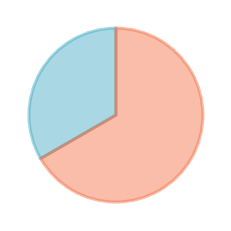

In [0]:
data = [15,30]

plt.subplots()
wedges, texts = plt.pie(data,
                        startangle=90,
                        colors=['#2A9FBC','#F15B2A'],
                        wedgeprops={'linewidth':3, 'alpha':.4})

colors=['#2A9FBC','#F15B2A']

for i, w in enumerate(wedges):
  w.set_edgecolor(colors[i])

In [0]:
!pip install pywaffle

     |████████████████████████████████| 532kB 2.8MB/s 


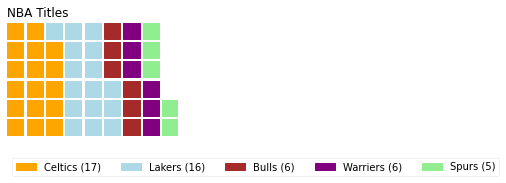

In [0]:
from pywaffle import Waffle

data = {'Celtics': 17, 'Lakers': 16, 'Bulls': 6, 'Warriers': 6, 'Spurs': 5}

fig = plt.figure(FigureClass=Waffle, rows=6, 
                 values=data,
                 colors=('orange','lightblue','brown','purple','lightgreen'),
                 title={'label': 'NBA Titles', 'loc': 'left'},
                 labels=["{0} ({1})".format(k,v) for k,v in data.items()],
                 legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol':len(data), 'framealpha':0.3})


In [0]:
data.items()

dict_items([('Celtics', 17), ('Lakers', 16), ('Bulls', 6), ('Warriers', 6), ('Spurs', 5)])

In [0]:
!pip install squarify

(0.0, 100.0, 0.0, 100.0)

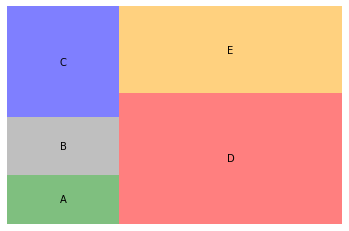

In [0]:
import squarify

data = [10,12,23,54,36]
labels = ['A','B','C','D','E']

squarify.plot(sizes=data, 
              label=labels,
              color=['green','grey','blue','red','orange'],
              alpha=0.5)

plt.axis('off')

In [0]:
import pandas as pd

category = ['lottery', 'buy_house', 'credit', 'party', 'sell_car', 'taxes']
data = {'amount': [150000, -35000, -17500, -5000, 103000, -17000]}

df = pd.DataFrame(data=data, index=category)

df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


In [0]:
cumsum = df.amount.cumsum().shift(1).fillna(0)
df.drop(columns='cumsum', inplace=True)

df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


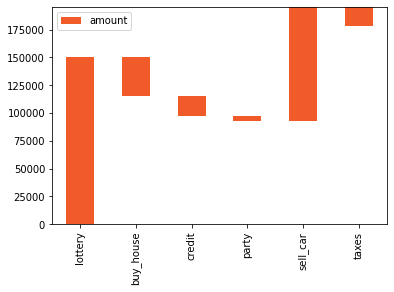

In [0]:
fig = df.plot(kind='bar',
              stacked=True,
              bottom=cumsum,
              color='#F15B2A')


In [0]:
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines

0         0.0
0         0.0
0    150000.0
1    150000.0
1    150000.0
1    115000.0
2    115000.0
2    115000.0
2     97500.0
3     97500.0
3     97500.0
3     92500.0
4     92500.0
4     92500.0
4    195500.0
5    195500.0
5    195500.0
5         NaN
Name: amount, dtype: float64

In [0]:
h_lines[1::3] = np.nan
h_lines

0         0.0
0         NaN
0    150000.0
1    150000.0
1         NaN
1    115000.0
2    115000.0
2         NaN
2     97500.0
3     97500.0
3         NaN
3     92500.0
4     92500.0
4         NaN
4    195500.0
5    195500.0
5         NaN
5         NaN
Name: amount, dtype: float64

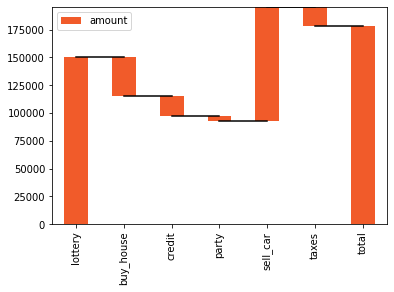

In [0]:
df.loc['total'] = df.sum().amount
cumsum.loc['total'] = 0

fig = df.plot(kind='bar', 
              stacked=True,
              bottom=cumsum,
              color='#F15B2A')

cumsum.loc['total'] = df[:-1].sum().amount
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan

fig.plot(h_lines.index,h_lines.values, 'black')